
# Law of Large Numbers and Central Limit Theorem

##### Keywords: sampling, Law of Large Numbers, Central Limit Theorem



### From Lab04, we know that the inverse CDF of an exponential distribution with parameter $\lambda$ is 

$$ x = -\frac{1}{\lambda}ln\left(1-u\right)$$

### Which can be written in python as the following function

In [1]:
######################################################################
## inverse CDF for exponential distribution
## with parameter lambda -- calculation by hand
######################################################################

def invCDF(arr,lam):
    if( type(arr) != type(np.array([])) ):
        try:
            arr = np.array(arr,dtype=float)
        except:
            print('wrong input for x')
            return np.array([])
    if( np.sum(arr<0) + np.sum(arr>=1) > 0 ):
        print('wrong input, should be in [0,1)')
        return np.array([])

    return -np.log(1-arr)/lam

### We want to mimic the 'mean of means method'  from class to sample from a population of random variables following the exponential distribution with parameter $\lambda$

1. We will do a large set M=1000 of experiments 
1. In each experiment, we will obtain 200 samples.
1. For the $N^{th}$ experiment, each sample is of size $N$. To obtain one sample, this means that you generate N random numbers $X_i$~$exp(\lambda)$, $i = 1,2,\dots,N$. One sample will be stored as $$\frac{\sum_{i=1}^{N}X_i}{N}~.$$ Then you repeat "generating one sample" 200 times, to obtain 200 samples.

1. For example: 
    1. the first experiment, you will generate 200 samples; each sample is of size 1, which is 1 random number $X_1$~$exp(\lambda)$; Then you store each sample as $$\frac{X_1}{1}$$ In total, you have 200 of them
    1. the 1000 th experiment, you will generate 200 samples; each sample is of size 1000, which are 1000 random numbers $X_i$~$exp(\lambda)$, $i = 1,2,\dots,1000$. One sample will be stored as $$\frac{\sum_{i=1}^{1000}X_i}{1000}$$
    In total, you have 200 of them

### For $\lambda = 0.5$, you code should do the following
1. Fix the number of experiments M as 1000. 
1. For N th experiment, generate 200 samples (from exponential distribution with parameter $\lambda$) of size N. Note, for each sample you should store the mean.
1. Note: for each experiment, you get an array of length 200. In total, you get a 1000 by 200 2-d array (I call it experiment_arr),  experiment_arr[k] is a row that stores the experiment with N = k+1 sample size.
1. Calculate the mean of each row of experiment_arr (This is the mean of means method). In total, you get a new array of length 1000
1. Now plot the histogram of the new array
1. set the figure size as (10,5). Take the array corresponding to the 10th experiment (experiment_arr[9]). Plot its density histogram, and plot the corresponding normal density function $N(\mu,\sigma^2)$ on the same figure. Note that you need to figure out what $\mu$ and $\sigma^2$ to use.
1. set the figure size as (10,5). Then take the array corresponding to the 100th experiment (experiment_arr[99]). Plot its density histogram, and plot the corresponding normal density function $N(\mu,\sigma^2)$ on the same figure. Note that you need to figure out what $\mu$ and $\sigma^2$ to use.
1. set the figure size as (10,5). Then take the array corresponding to the 1000th experiment (experiment_arr[999]). Plot its density histogram, and plot the corresponding normal density function $N(\mu,\sigma^2)$ on the same figure. Note that you need to figure out what $\mu$ and $\sigma^2$ to use.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def invCDF(arr,lam):
    if( type(arr) != type(np.array([])) ):
        try:
            arr = np.array(arr,dtype=float)
        except:
            print('wrong input for x')
            return np.array([])
    if( np.sum(arr<0) + np.sum(arr>=1) > 0 ):
        print('wrong input, should be in [0,1)')
        return np.array([])

    return -np.log(1-arr)/lam

In [3]:
## function: to sample out N random variables follows exp(lam)
##################################################
def size_N_sample(N,lam):
    if( N<=0 or lam <=0 ):
        print('wrong input')
        return np.array([])
    
    ## this is to use inverse sampling to generate N random
    ## values follows exp(lam)
    ##################################################
    uu     = np.random.rand(N)
    result = invCDF(uu,lam)

    return result


def make_experiments(number_of_samples, sample_size, lam):
    
    ## This is to reserve space to store experiment outputs
    ##################################################
    start=np.zeros((number_of_samples, sample_size))
    
    ## Fix sample_size, generate sample_size many random values
    ## In total, I want number_of_samples many samples
    ## Each row corresponds to one sample with sample_size many r.v.
    ##################################################
    for i in range(number_of_samples):
        start[i,:]=size_N_sample(sample_size,lam)

    ## Then take the mean of each row
    ## This gives one sample
    ##################################################
    return np.mean(start, axis=1)



In [4]:
## For example if I want 5 samples, each of size 10; follows exp(0.5)
## the function make_experiments, will first generate the matrix "start"
## Each row of start is of length 10 and there are totally 5 rows
## Then I take the mean of each row of start by: np.mean(start, axis=1)
## This will give me 5 samples, each of size 10
##################################################
make_experiments(5,10,0.5)

array([ 2.84206004,  1.09836292,  2.10233389,  1.21168081,  2.11295636])

In [5]:
## Now I want to fix number of samples as 200
## for each sample_size N in (1,2,3...,1000)
## For each N, i will generate 200 samples
##################################################

sample_sizes    =  np.arange(1,1001,1)

# this is to store: for each sample size N, 200 samples; there are totally 
# 1000 experiments, each has 200 samples, 
# each sample is of size n, where n = 1,2,3.., 1000
# Note that: np.array() makes the output experiment_arr of type 2d-array
##################################################
experiment_arr  = np.array([make_experiments(number_of_samples=200, sample_size=i,lam = 0.5) 
                        for i in sample_sizes])

## This is to calculate for each experiment,
## the mean of the 200 samples in that experiment
##################################################
mean_of_sample_means = np.array([np.mean(means) for means in experiment_arr])

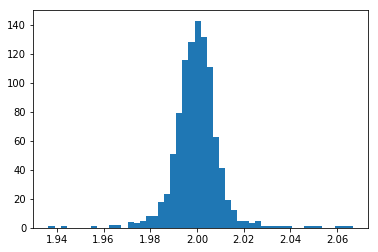

In [6]:
## This is to plot the histogram of mean_of_sample_means
##################################################

plt.hist(mean_of_sample_means,bins = 50,
         range=(min(mean_of_sample_means),max(mean_of_sample_means))
        )
plt.show()

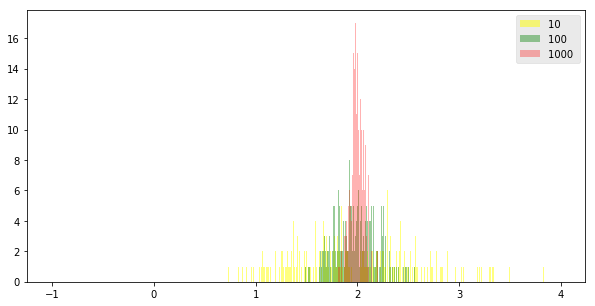

In [7]:
## Take the array corresponding to the 10th, 100th, 1000th experiment
## Note that array indices in python all start with 0,
## So the 0th row in experiment_arr is the 1st experiment
##        1st row in experiment_arr is the 2nd experiment
##        kth row in experiment_arr is the (k+1)th experiment
## So the  9th row in experiment_arr is the 10th    experiment. i.e. of sample size 10
## So the 99th row in experiment_arr is the 100th   experiment. i.e. of sample size 100
## So the 99th row in experiment_arr is the 10000th experiment. i.e. of sample size 1000
#########################################################################################

sample_means_at_size_10  =experiment_arr[9]
sample_means_at_size_100 =experiment_arr[99]
sample_means_at_size_1000=experiment_arr[999]

##  This is to test if your code is correct
## As the size gets larger,
## you should see your histogram gets skinnier.
##################################################

plt.figure(figsize = (10,5))
plt.hist(sample_means_at_size_10, color = 'yellow',
         bins=np.arange(-1,4,0.01), label = '10 ',
         alpha=0.5);
plt.hist(sample_means_at_size_100, color = 'green',
         bins=np.arange(-1,4,0.01), label = '100 ',
         alpha=0.4);
plt.hist(sample_means_at_size_1000, color = 'red',
         bins=np.arange(-1,4,0.01), label = '1000 ',
         alpha=0.3);
plt.style.use('ggplot')
plt.legend()
plt.show()

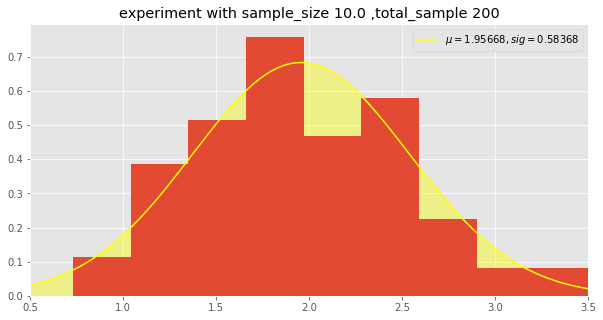

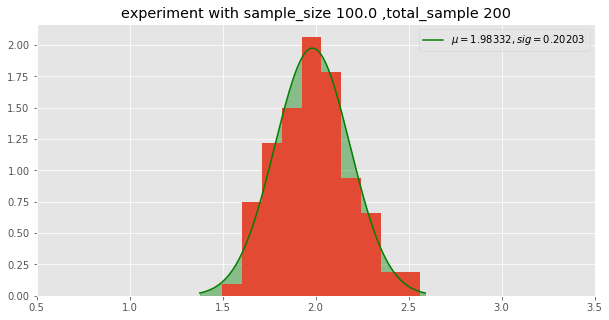

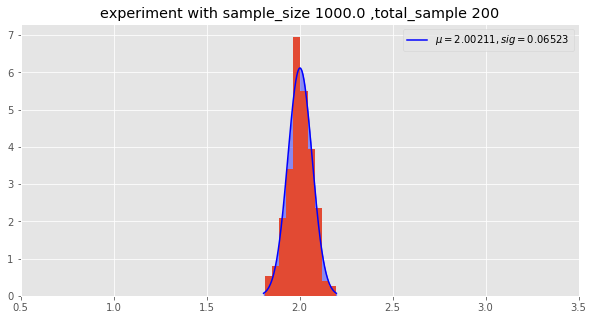

In [12]:
## To use normal distribution, we load scipy modulo and its submodule stats
##################################################
import scipy as sp
import scipy.stats

## Load in normal distribution 
##################################################
norm =  sp.stats.norm


## mean for size_10, 100, 1000 experiment
##################################################
mu_s  = [np.mean(sample_means_at_size_10),
        np.mean(sample_means_at_size_100),
        np.mean(sample_means_at_size_1000)]


## standard deviation for size_10, 100, 1000 experiment
##################################################
sig_s = [np.std(sample_means_at_size_10),
        np.std(sample_means_at_size_100),
        np.std(sample_means_at_size_1000)]


mean_of_means = [sample_means_at_size_10, 
                 sample_means_at_size_100, 
                 sample_means_at_size_1000]

ind = 0


for mu, sigma, c in zip(mu_s, sig_s, ['yellow','green','blue']):
    plt.figure(figsize=(10,5))
    x    = np.linspace(mu-3*sigma,mu+3*sigma, 200)
    samp = mean_of_means[ind]
    ind  += 1

    # This is to plot normal distribution curve
    plt.plot(x, norm.pdf(x, mu, sigma),
             c=c, label = r"$\mu = {0:.5f}, sig={1:.5f}$".format(mu, sigma))
    
    # This is to plot samples histogram normalized to 1
    plt.hist(samp,  normed = 1);
    plt.fill_between(x, norm.pdf(x, mu, sigma), color=c, alpha = .4)
    plt.title(r'experiment with sample_size {0:.1f}'.format(10**ind)+' ,total_sample 200')
    plt.legend(loc=0)
    plt.xlim([0.5,3.5])

    plt.show()

#


